# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

# 读取数据

引入`pandas`、`numpy`、`matplotlib.pyplot`、`seaborn`库，并使用`pandas`库的`read_csv`读取文件`Penguins.csv`，并命名为`original_penguins`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
original_penguins = pd.read_csv("Penguins.csv")

In [4]:
original_penguins.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
257,Gentoo,Biscoe,44.4,17.3,219.0,5250.0,MALE
312,Gentoo,Biscoe,45.5,14.5,212.0,4750.0,FEMALE
240,Gentoo,Biscoe,50.2,14.3,218.0,5700.0,MALE
41,Adelie,Dream,40.8,18.4,195.0,3900.0,MALE
27,Adelie,Biscoe,40.5,17.9,187.0,3200.0,FEMALE
252,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,FEMALE
183,Chinstrap,Dream,54.2,20.8,201.0,4300.0,MALE
295,Gentoo,Biscoe,48.6,16.0,230.0,5800.0,MALE
32,Adelie,Dream,39.5,17.8,188.0,3300.0,FEMALE
109,Adelie,Biscoe,43.2,19.0,197.0,4775.0,MALE


从输出结果来看，每行表示一类企鹅的相关信息，每列表示其不同属性，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

# 评估数据

评估主要从结构和内容两方面展开，即整齐度和干净度。  
整齐度需要满足：每列是一个变量、每行是一个观察值、每个单元格是一个值  
干净度主要从：数据缺失、数据重复、数据不一致、数据错误或无效开展

### 评估整齐度

In [5]:
original_penguins.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


从以上输出结果来看，满足每列是一个变量、每行是一个观察值、每个单元格是一个值，无需对整齐度进行调整

### 评估干净度

查看`original_penguins`的DataFrame概况

In [6]:
original_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


根据输出结果，总共344个观察值，其中`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`、`sex`变量均存在缺失，将在后续进一步评估。
数据类型方面，我们已知`species`（企鹅种类）`sex`（企鹅性别）、`island`（企鹅所在岛）都是分类数据，因此可以把数据类型都转换为Category。

#### 评估缺失数据

查看`culmen_length_mm`的缺失信息

In [7]:
original_penguins[original_penguins["culmen_length_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [8]:
original_penguins[original_penguins["culmen_depth_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [9]:
original_penguins[original_penguins["flipper_length_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [10]:
original_penguins[original_penguins["body_mass_g"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


以上，可以看到索引为3和339的观察值，除了种类和所属岛屿外所有变量都为空，无法为探索企鹅身体属性相关因素提供价值，因此可以把这两行直接删除。

查看`sex`的缺失信息

In [11]:
original_penguins[original_penguins["sex"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


`sex`变量缺失10条数据值，但其他数据值都存在，仍可提供分析价值，由于`Pandas`以及`Matplotlib`、`Seaborn`会自动忽略缺失值，可以将其保留

#### 评估重复数据

In [12]:
original_penguins.duplicated().sum()

0

根据输出结果，不存在重复数据

#### 评估不一致数据

`original_penguins`中可能`species`、`island`、`sex`存在数据不一致

In [13]:
original_penguins["species"].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [14]:
original_penguins["island"].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [15]:
original_penguins["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

从上述输出结果来看，不存在不一致数据，但`sex`中的句号，属于无效值，应该替换为NaN

#### 评估错误或无效数据

通过describe方法查看是否存在异常值

In [16]:
original_penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


从输出结果来看，不存在脱离显示意义的数值

# 清理数据

为了区分原始数据与清理后的数据，将原始数据复制给`cleaned_penguins`，后续操作将对`cleaned_penguins`进行

In [17]:
cleaned_penguins = original_penguins.copy()
cleaned_penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


接下来根据上述评估结果，清理数据任务有：
- 替换`sex`中的句号为NaN值
- 清理`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`缺失数据，即索引为3和339的观察值
- 将`species`（企鹅种类）`sex`（企鹅性别）、`island`（企鹅所在岛）的数据类型都转换为Category。

替换'sex'中的句号为NaN值，并检查是否成功

In [18]:
cleaned_penguins["sex"] = cleaned_penguins["sex"].replace(".", np.nan)
cleaned_penguins["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

清理索引为3和339的观察值，并检查是否成功

In [19]:
cleaned_penguins.drop([3,339], inplace=True)
cleaned_penguins["culmen_length_mm"].isnull().sum()

0

转换数据类型，并查看是否成功

In [20]:
cleaned_penguins['species'] = cleaned_penguins['species'].astype("category")
cleaned_penguins['sex'] = cleaned_penguins['sex'].astype("category")
cleaned_penguins['island'] = cleaned_penguins['island'].astype("category")

In [21]:
cleaned_penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.7 KB


In [22]:
cleaned_penguins.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
313,Gentoo,Biscoe,49.5,16.1,224.0,5650.0,MALE
287,Gentoo,Biscoe,49.5,16.2,229.0,5800.0,MALE
146,Adelie,Dream,39.2,18.6,190.0,4250.0,MALE
270,Gentoo,Biscoe,46.6,14.2,210.0,4850.0,FEMALE
234,Gentoo,Biscoe,45.8,14.6,210.0,4200.0,FEMALE
236,Gentoo,Biscoe,42.0,13.5,210.0,4150.0,FEMALE
42,Adelie,Dream,36.0,18.5,186.0,3100.0,FEMALE
230,Gentoo,Biscoe,40.9,13.7,214.0,4650.0,FEMALE
255,Gentoo,Biscoe,48.4,16.3,220.0,5400.0,MALE
229,Gentoo,Biscoe,46.8,15.4,215.0,5150.0,MALE


# 探索数据

我们将通过数据可视化，进行探索和分析，从图表中获得企鹅样本数据的相关洞察。

In [23]:
# 设置图表色盘为pastel(搜索seaborn palette查看更多色盘)
sns.set_palette("pastel")

In [24]:
cleaned_penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


### 探索分类变量

#### **企鹅种类比例**

In [27]:
species_count = cleaned_penguins["species"].value_counts()
species_count

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

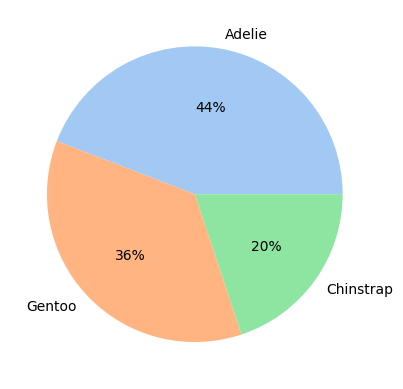

In [28]:
plt.pie(species_count, autopct="%.0f%%",labels=species_count.index)
plt.show()

样本中Adelie这个种类的企鹅占比最大，Gentoo种类的占比次之，Chinstrap的占比最小，为1/5左右。

#### **企鹅所属岛屿比例**

In [29]:
island_count = cleaned_penguins["island"].value_counts()
island_count

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

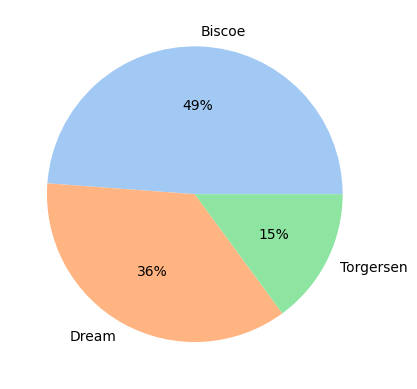

In [30]:
plt.pie(island_count, autopct="%.0f%%",labels=island_count.index)
plt.show()

样本中一半左右的企鹅样本都来自Biscoe岛屿，占比最大，其次是Dream岛屿，来自Torgersen岛屿的样本最少

#### **企鹅性别比例**

In [31]:
sex_count = cleaned_penguins["sex"].value_counts()
sex_count

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

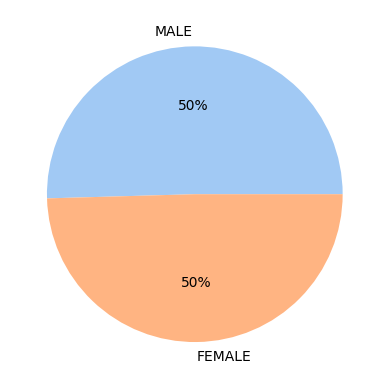

In [32]:
plt.pie(sex_count, autopct="%.0f%%",labels=sex_count.index)
plt.show()

样本企鹅的性别占比持平，符合随机抽样

#### **不同岛上的企鹅种类数量**

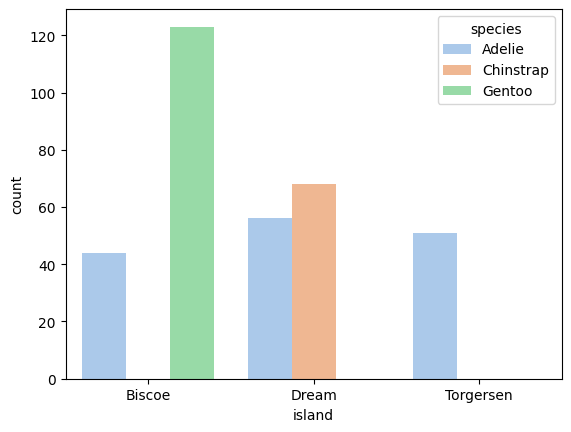

In [33]:
# 计数图y轴默认是样本的数量
sns.countplot(cleaned_penguins, x="island", hue="species")
plt.show()

从以上可以看出，Adelie种类的企鹅样本在Biscoe、Dream、Torgersen这三个岛上都有，而Chinstrap种类只在Dream岛上才有，Gentoo只在Biscoe岛上才有

#### **不同岛屿上的企鹅性别数量**

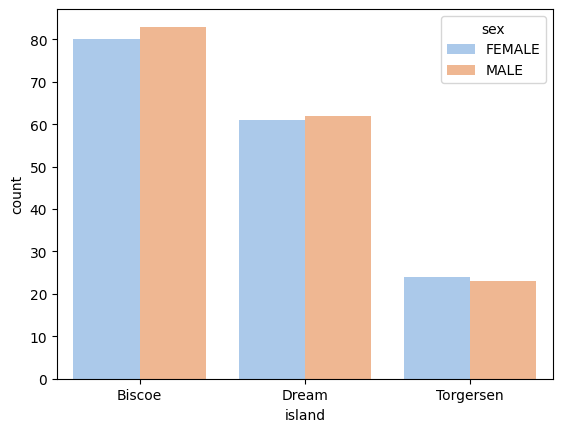

In [34]:
sns.countplot(cleaned_penguins, x="island", hue="sex")
plt.show()

### 探索数值变量

#### **查看数值之间的相关关系**

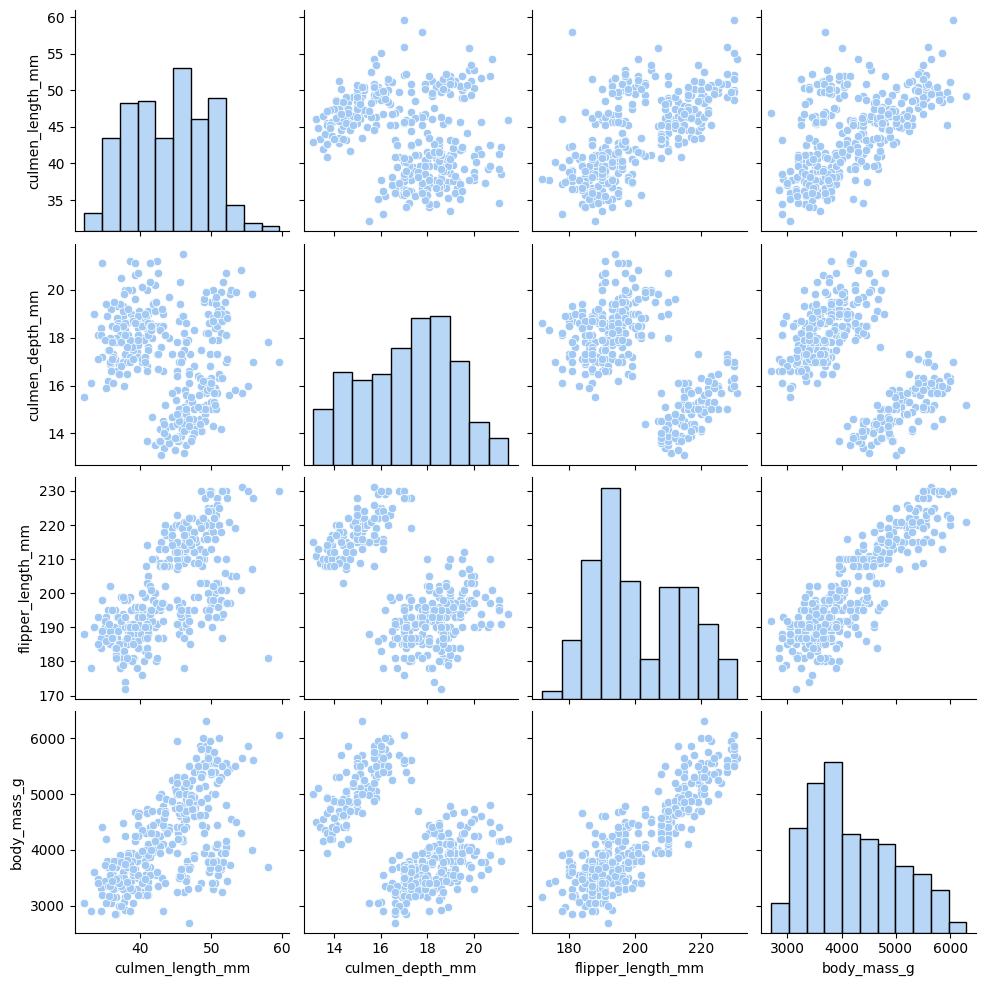

In [36]:
sns.pairplot(cleaned_penguins)
plt.show()

从直方图来看，企鹅样本的嘴峰长度、嘴峰深度、鳍长度、体重的分布不是正态分布。一方面说明，这里面可能包含了多组存在差异的样本数据，另一方面也说明样本数不够大。

另外可以在散点图中看出明显的多个集群，可能与某些因素有关，比如企鹅种类、性别，因此可以对对比进行进一步的分类。

#### **根据种类查看数值之间的相关关系**

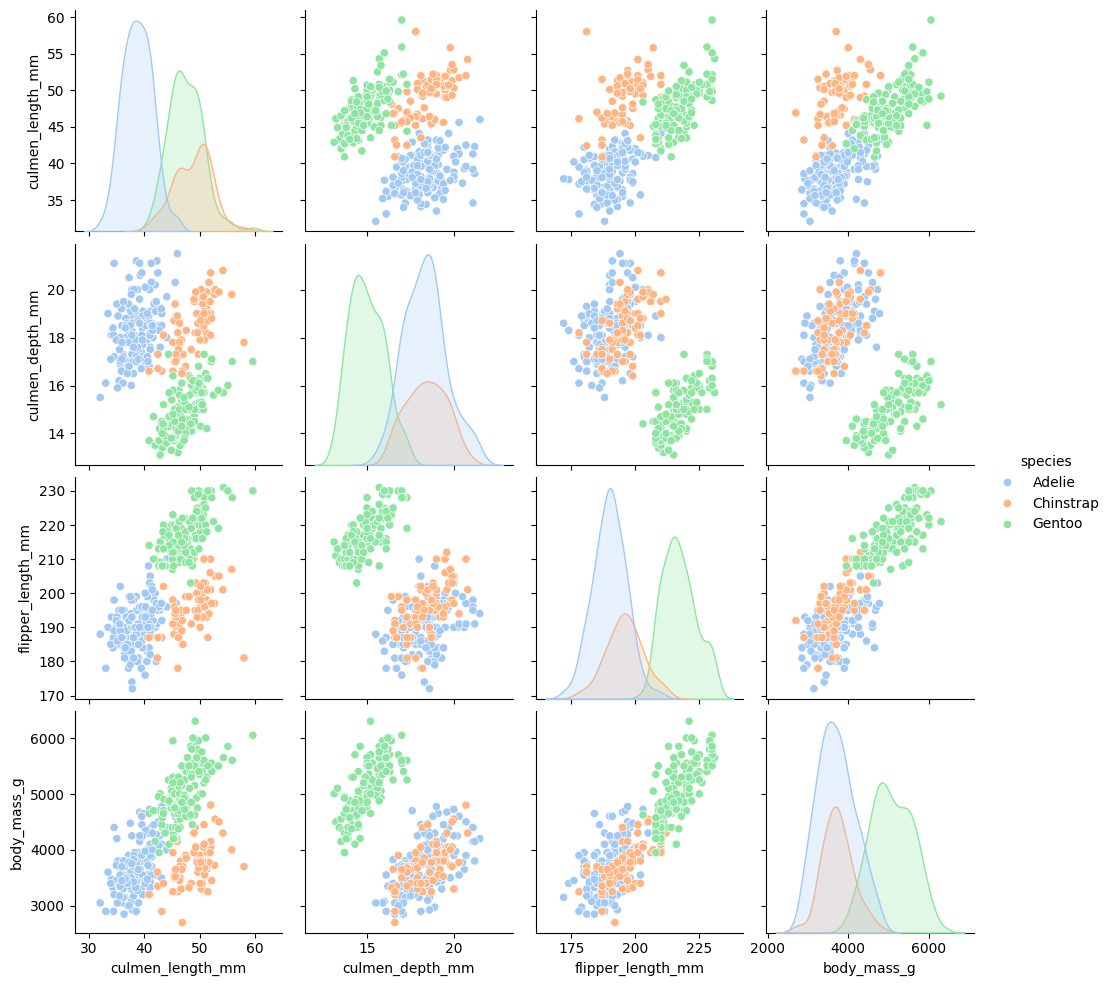

In [39]:
sns.pairplot(cleaned_penguins, hue='species')
plt.show()

同一种类的企鹅样本数据，在散点图上基本都聚在一起，说明同一种类的企鹅在嘴峰长度、嘴峰深度、鳍长度、体重之间关系上，存在相似性。这些发现有利于我们根据体重、鳍长等数值推测企鹅种类，也可以根据企鹅种类推测体重、鳍长等数值。

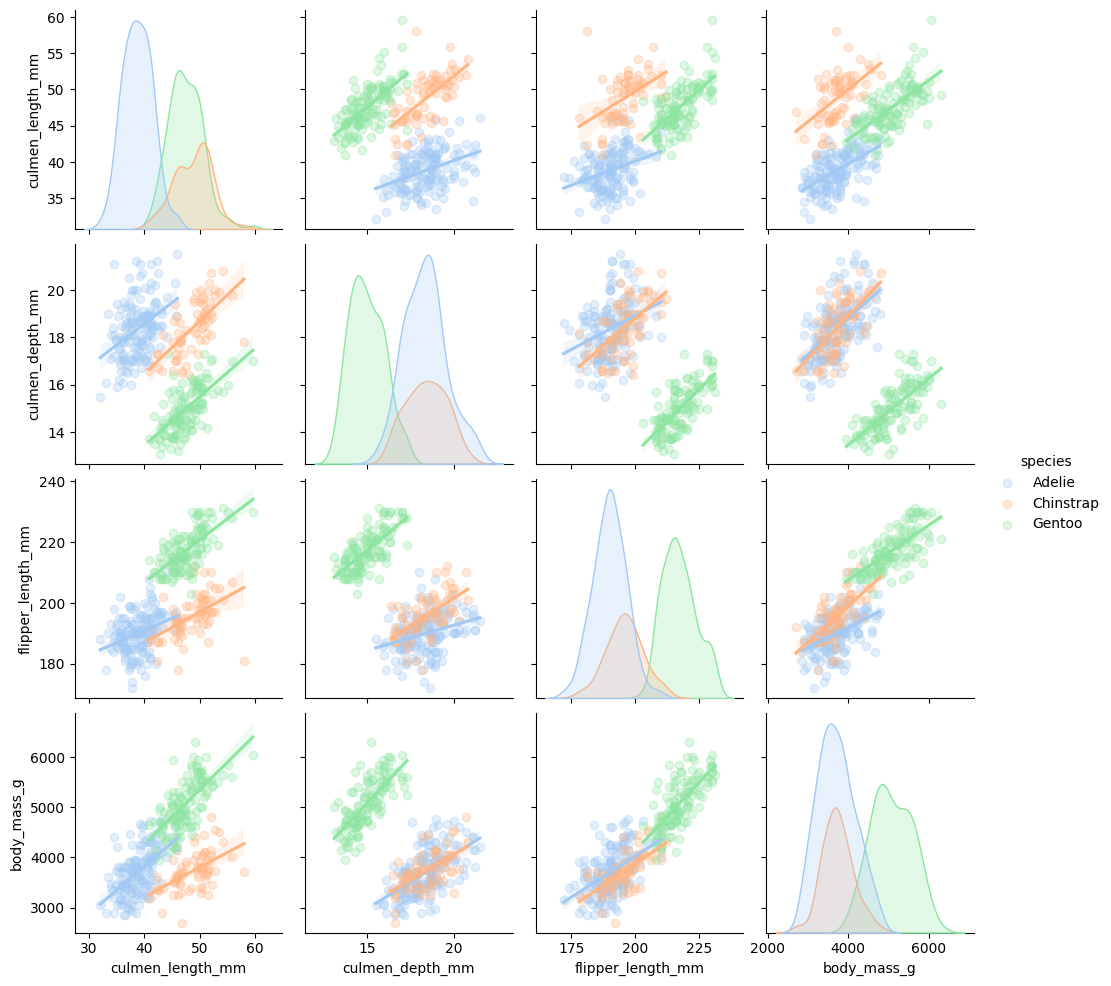

In [38]:
# kind可选参数，可增加趋势线，kind="reg"为线性回归线
# plot_kws用于调整图上的具体参数，如调整点的透明度、趋势线的颜色等，且要指明要调整哪个图
# alpha表示透明度：1表示不透明，0表示全透明
sns.pairplot(cleaned_penguins, hue="species", kind="reg", plot_kws={'scatter_kws':{'alpha':0.3}})
plt.show()

散点图结合线性回归线来看，同类企鹅的属性数据之间均呈线性正比，即嘴峰越长，嘴峰越深，鳍越长，体重越重，嘴峰越短，嘴峰越浅，鳍越短，体重越轻。

从密度图的分布来看，可以得到以下关于样本的发现：

- Chinstrap和Gentoo的嘴峰长度范围较为接近，而Adelie的嘴峰长度更短。
- Adelie和Chinstrap的嘴峰深度范围较为接近，而Gentoo的嘴峰深度更短。
- Adelie的鳍长度最短，Chinstrap中等，而Gentoo的鳍长度嘴长。
- Adelie和Chinstrap的体重范围较为接近，而Gentoo的体重更大。  
但不同种类的属性数值否存在统计显著性差异，仍然需要进行假设检验后才能得到结论。

#### **根据性别查看数值之间的关系**

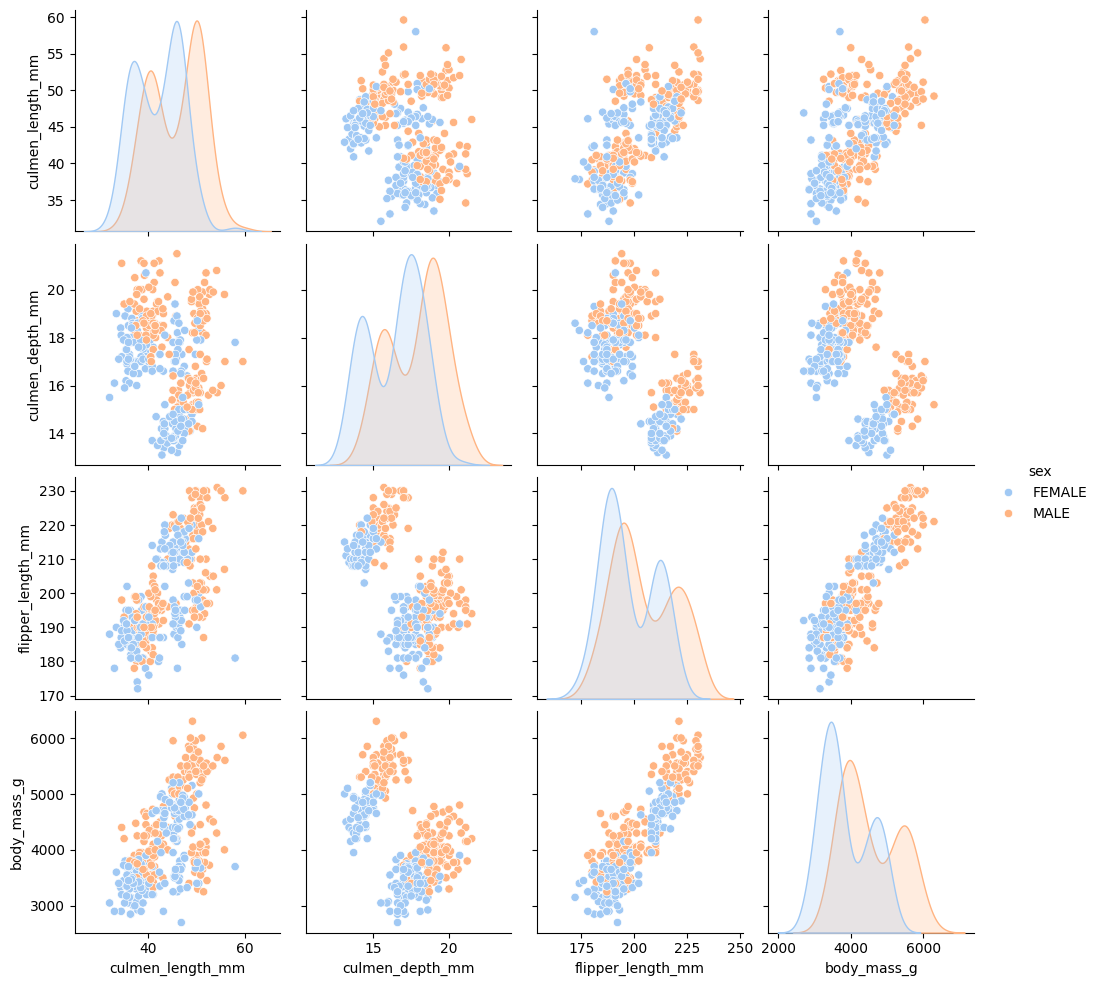

In [40]:
sns.pairplot(cleaned_penguins,hue="sex")
plt.show()

根据性别划分后可以看出，样本中雄性企鹅在各项属性数值方面大于雌性企鹅。

# 保存数据

In [41]:
cleaned_penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [42]:
cleaned_penguins.to_csv("penguins_cleaned.csv",index=False)

In [43]:
pd.read_csv("penguins_cleaned.csv").head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
